In [244]:
#Importing all the required libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import re
import operator
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer

In [245]:
#Reading the data from excel Dataframes and concatinating all the sheets
df1 = pd.read_excel("C:\Machine Learning\Sentimental Analysis\comments.csv", sheetname='test1')
df2 = pd.read_excel("C:\Machine Learning\Sentimental Analysis\comments.csv", sheetname='test2')
df3 = pd.read_excel("C:\Machine Learning\Sentimental Analysis\comments.csv", sheetname='test3')
df4 = pd.read_excel("C:\Machine Learning\Sentimental Analysis\comments.csv", sheetname='test4')
frames = [df1,df2,df3,df4]
#Original data
df = pd.concat(frames)



In [246]:
#Extracting the desired coloumns of intrest
df_new = df[['SOURCE','TONE','COMMENT']]
total_count =  df_new.groupby('TONE').count()
pos_count= total_count.iat[3,0]
neut_count= total_count.iat[1,0]
neg_count= total_count.iat[0,0]
print("Total number of Positive Comments : %s" % pos_count)
print("Total number of Negative Comments : %s" % neg_count)
print("Total number of Neutral Comments : %s" % neut_count)
#Converting the comment conuts to lists to plot the values
count_list = list([eval('pos_count'),eval('neg_count'),eval('neut_count')])


Total number of Positive Comments : 81
Total number of Negative Comments : 284
Total number of Neutral Comments : 209


Text(0,0.5,'Comment Count')

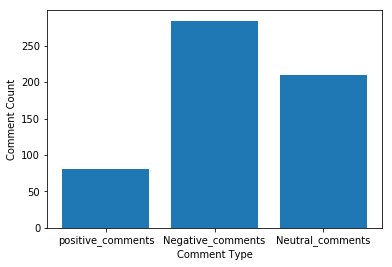

In [247]:
#Visualize Bar Chart
%matplotlib inline
x= ['positive_comments','Negative_comments', 'Neutral_comments']
index = np.arange(len(x))
plt.bar(index,count_list)
plt.xticks(index,x)
plt.xlabel('Comment Type')
plt.ylabel ('Comment Count')

([<matplotlib.patches.Wedge at 0x128b7048>,
 [Text(0.993663,0.471841,'positive_comments'),
  Text(-0.840926,0.709114,'Negative_comments'),
  Text(0.455462,-1.00128,'Neutral_comments')],
 [Text(0.541998,0.257368,'14.1'),
  Text(-0.458687,0.386789,'49.5'),
  Text(0.248434,-0.546151,'36.4')])

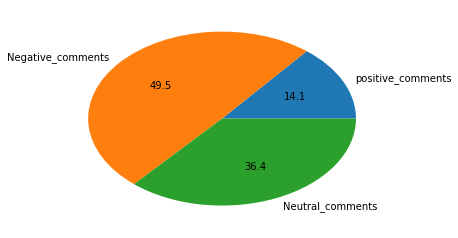

In [248]:
#Visualize Bar Chart
%matplotlib inline
x= ['positive_comments','Negative_comments', 'Neutral_comments']
plt.pie(count_list,labels = x,autopct='%1.1f')


In [249]:
df_new.head(1)

,SOURCE,TONE,COMMENT
0,Google Play,Negative,Bring back the previous version NOW until you ...


In [250]:
# Remove NAN and 
df_new.isnull().sum()
nan_rows = df_new[df_new['TONE'].isnull()]
nan_rows.tail(1)
df_nan_removed = df_new.dropna()
df_nan_removed.count()
df_nan_removed.isnull().sum()

SOURCE     0
TONE       0
COMMENT    0
dtype: int64

In [251]:
#Remove Neutral Comments for first trail
df_remove_neutral = df_nan_removed[df_nan_removed['TONE']== 'Neutral']
df_clean = df_nan_removed.drop(df_remove_neutral.index,axis=0)
df_clean.count()
df_clean.groupby('TONE').count()

,SOURCE,COMMENT
TONE,,
Negative,163,163
Positive,47,47


In [252]:
# Replacing Positive and Negative with 1 and 0
value_map = {'Positive': 1, 'Negative': 0}
df_integers = df_clean.replace({'TONE': value_map})
df_integers.head(10)

,SOURCE,TONE,COMMENT
0,Google Play,0,Bring back the previous version NOW until you ...
1,Google Play,1,It's very helpful in many ways !
5,Facebook,0,(1) This thing sucked. (2) Got my etf back. Th...
6,Facebook,0,Most people don't....someone just wanna complain.
14,Facebook,1,I've literally heard no one talking about this...
15,Facebook,0,"Just what the world needs, more bullshit to di..."
17,Facebook,0,Never seen anything like this happen either.
21,Facebook,0,(1) Just what we need more invasive technology...
32,Google Play,0,Was working great then all of a sudden my mpg ...
38,Facebook,0,They want everyone to have this device and new...


In [253]:
#Selecting REquired Coloumns TONE and Comment
df_integers_a = df_integers[['TONE','COMMENT']]
df_integers_a.head(1)
# Replacing the values insisde brackets in the comemnts section, this needs to be applied on each element separetly
#thus we will use apply method and a lambda function 
dfa = df_integers_a['COMMENT'].apply(lambda x: re.sub(r"\(.*\) ", "", x))
#Merging with Original DF
df_naive_bayes = pd.concat([df_integers_a['TONE'],dfa], axis =1)
#Regex to remove all other characters except Alphabets
dfb = df_naive_bayes['COMMENT'].apply(lambda x: re.sub ('[^A-Za-z\s]+', '', x))
df_final = pd.concat ([df_integers_a['TONE'],dfb], axis =1)

In [254]:
df_final

,TONE,COMMENT
0,0,Bring back the previous version NOW until you ...
1,1,Its very helpful in many ways
5,0,Got my etf back They still charged me for the...
6,0,Most people dontsomeone just wanna complain
14,1,Ive literally heard no one talking about this ...
15,0,Just what the world needs more bullshit to dis...
17,0,Never seen anything like this happen either
21,0,Me no someone that doesnt know about cars migh...
32,0,Was working great then all of a sudden my mpg ...
38,0,They want everyone to have this device and new...


In [257]:
#Removing Stop words
stop = stopwords.words('english')
df_stopwords_removed = df_final['COMMENT'].apply(lambda  x: ' '.join([word for word in x.split() if word not in (stop)]))
df_final = pd.concat ([df_integers_a['TONE'],df_stopwords_removed], axis =1)
df_final.head(10)

,TONE,COMMENT
0,0,Bring back previous version NOW fix update I t...
1,1,Its helpful many ways
5,0,Got etf back They still charged device paid re...
6,0,Most people dontsomeone wanna complain
14,1,Ive literally heard one talking Great marketin...
15,0,Just world needs bullshit distract drivers DRI...
17,0,Never seen anything like happen either
21,0,Me someone doesnt know cars might Ill take tec...
32,0,Was working great sudden mpg numbers went mid ...
38,0,They want everyone device new cars built Insur...


In [258]:
df1_final.shape

(5, 1)

In [47]:
# Countvectorizer
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(df_final['COMMENT'])
dict1 = vectorizer.vocabulary_
dict1.values
len(dict1)
max(dict1, key= lambda i:dict1[i])

vectorizer.vocabulary_
sorted_dict1 = sorted (dict1.items(), key=operator.itemgetter(0),reverse = True)
sorted_dict1

[('zoom', 1486),
 ('zero', 1485),
 ('yukon', 1484),
 ('yr', 1483),
 ('youve', 1482),
 ('youre', 1481),
 ('your', 1480),
 ('you', 1479),
 ('yet', 1478),
 ('yesterday', 1477),
 ('yellow', 1476),
 ('years', 1475),
 ('year', 1474),
 ('yea', 1473),
 ('yay', 1472),
 ('wth', 1471),
 ('wtf', 1470),
 ('wrong', 1469),
 ('write', 1468),
 ('wreck', 1467),
 ('wow', 1466),
 ('wouldnt', 1465),
 ('would', 1464),
 ('worthy', 1463),
 ('worthless', 1462),
 ('worthit', 1461),
 ('worth', 1460),
 ('worst', 1459),
 ('worse', 1458),
 ('worries', 1457),
 ('world', 1456),
 ('works', 1455),
 ('working', 1454),
 ('worked', 1453),
 ('work', 1452),
 ('words', 1451),
 ('word', 1450),
 ('woods', 1449),
 ('wont', 1448),
 ('wonderful', 1447),
 ('woman', 1446),
 ('without', 1445),
 ('withing', 1444),
 ('with', 1443),
 ('wish', 1442),
 ('wireless', 1441),
 ('wipes', 1440),
 ('wifi', 1439),
 ('wife', 1438),
 ('wide', 1437),
 ('why', 1436),
 ('whos', 1435),
 ('whole', 1434),
 ('who', 1433),
 ('wheres', 1432),
 ('when', 143

In [50]:
#TFIDF Vectorizer
tfvectorizer = TfidfVectorizer()
tvector = tfvectorizer.fit_transform(df_lemmatized)
print(tvector.shape)
print(tfvectorizer.idf_)
print(tvector.toarray())
type(tvector)

(210, 1406)
[ 4.96556377  5.65871095  4.96556377 ...,  5.65871095  4.96556377
  4.96556377]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


scipy.sparse.csr.csr_matrix

In [52]:
#Print Top N features of TFIDF Vectorizers Vocabulary
#Get the estimator params
params = tfvectorizer.get_params
print ('The TFIDF Params are : \n %s' %params)
features =tfvectorizer.get_feature_names()
#print ('The TFIDF FEATURE LIST : \n %s' %features)
#Argsort will give index of highest to lowest to hoighest values. 
#idf_ will give the weights or tfidf scores
indices = np.argsort(tfvectorizer.idf_)[::-1]
#Prinitng by passing top n value
top_n=10
top_features = [features[i] for i in indices[:top_n]]
print('The Top %s features are : /n %s ' %(top_n ,top_features))
print ('The top {0} features are : \n {1}'.format (top_n, top_features))
df5 = pd.DataFrame(top_features)




The TFIDF Params are : 
 <bound method BaseEstimator.get_params of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>
The Top 10 features are : /n ['causing', 'payment', 'dictator', 'patriots', 'patient', 'pathetic', 'past', 'cesaro', 'greati', 'ground'] 
The top 10 features are : 
 ['causing', 'payment', 'dictator', 'patriots', 'patient', 'pathetic', 'past', 'cesaro', 'greati', 'ground']


In [214]:
#Stemming
#Before stemming we need to tokenize he data frame by splitting words on spaces.
#After stemming we need to join them again based on spaces.
df_tokenized = df_final['COMMENT'].apply(lambda x: filter(None, x.split(" ")))
stemmer = SnowballStemmer("dutch")
#stemmer = PorterStemmer()
d1 = df_tokenized.apply(lambda x: [stemmer.stem(y) for y in x])
df_stemmed = d1.apply(lambda x: " ".join(x))
#Output is series we need to convert to frame
df_stem = df_stemmed.to_frame()
df_stem

,COMMENT
0,bring back previous version now fix updat i tw...
1,its helpful many way
5,got etf back they still charged devic paid res...
6,most peopl dontsomeon wanna complain
14,ive literally heard one talking great market guy
15,just world ned bullshit distract driver drivin...
17,never sen anyth lik happ either
21,me someon doesnt know car might ill tak techno...
32,was working great sud mpg number went mid mid ...
38,they want everyon devic new car built insuranc...


In [212]:
#Lemmatization
#Before lemmatizing we need to tokenize he data frame by splitting words on spaces.
#After lemmatizing we need to join them again based on spaces.
df_tokenized = df_final['COMMENT'].apply(lambda x: filter(None, x.split(" ")))
lemmatiser = WordNetLemmatizer()
d2 = df_tokenized.apply(lambda x: [lemmatiser.lemmatize(y) for y in x])
df_lemmatized = d2.apply(lambda x: " ".join(x))
type(df_lemmatized)
df_lemma = df_lemmatized.to_frame()
print(df_lemma.shape)
df_lemma[:10]

(210, 1)


,COMMENT
0,Bring back previous version NOW fix update I t...
1,Its helpful many way
5,Got etf back They still charged device paid re...
6,Most people dontsomeone wanna complain
14,Ive literally heard one talking Great marketin...
15,Just world need bullshit distract driver DRIVI...
17,Never seen anything like happen either
21,Me someone doesnt know car might Ill take tech...
32,Was working great sudden mpg number went mid m...
38,They want everyone device new car built Insura...


In [217]:
#TFIDF Vectorizer
tfvectorizer = TfidfVectorizer()
tvector = tfvectorizer.fit_transform(df_lemmatized)
print(tvector.shape)
print(tfvectorizer.idf_)
print(tvector.toarray())
type(tvector)

(210, 1406)
[ 4.96556377  5.65871095  4.96556377 ...,  5.65871095  4.96556377
  4.96556377]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


scipy.sparse.csr.csr_matrix

In [218]:
#Print Top N features of TFIDF Vectorizers Vocabulary
#Get the estimator params
params = tfvectorizer.get_params
print ('The TFIDF Params are : \n %s' %params)
features =tfvectorizer.get_feature_names()
#print ('The TFIDF FEATURE LIST : \n %s' %features)
#Argsort will give index of highest to lowest to hoighest values. 
#idf_ will give the weights or tfidf scores
indices = np.argsort(tfvectorizer.idf_)[::-1]
#Prinitng by passing top n value
top_n=50
top_features = [features[i] for i in indices[:top_n]]
print('The Top %s features are : /n %s ' %(top_n ,top_features))
#print ('The top {0} features are : \n {1}'.format (top_n, top_features))
features


The TFIDF Params are : 
 <bound method BaseEstimator.get_params of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>
The Top 50 features are : /n ['causing', 'payment', 'dictator', 'patriots', 'patient', 'pathetic', 'past', 'cesaro', 'greati', 'ground', 'park', 'parenting', 'parenthood', 'diana', 'ha', 'pant', 'hand', 'pack', 'owner', 'overwritten', 'overpriced', 'overallthis', 'overall', 'greasy', 'peaceofmind', 'otherwise', 'did', 'pointless', 'carrier', 'carry', 'gotta', 'dies', 'case', 'playslow', 'play', 'cash', 'placed', 'grade', 'pitch', 'catastrophic', 'picture', 'phones', 'phoned', 'grand

['aaa',
 'abandon',
 'ability',
 'able',
 'abruptly',
 'absolutely',
 'abuser',
 'abysmal',
 'accept',
 'access',
 'accessible',
 'accessing',
 'accident',
 'accient',
 'account',
 'accurate',
 'action',
 'activate',
 'activation',
 'actuall',
 'actually',
 'acura',
 'ad',
 'add',
 'added',
 'adding',
 'addition',
 'address',
 'administrator',
 'advantage',
 'advertisement',
 'advice',
 'affordable',
 'after',
 'again',
 'aggravation',
 'ago',
 'agothe',
 'agreement',
 'aint',
 'airbag',
 'alert',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'altogether',
 'always',
 'ampt',
 'and',
 'andirobinsonaolcom',
 'andrea',
 'another',
 'answer',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'ap',
 'apologized',
 'app',
 'apparently',
 'appears',
 'apply',
 'appreciate',
 'approved',
 'apps',
 'april',
 'area',
 'aroccozoominternetnetfor',
 'arrived',
 'as',
 'ask',
 'asked',
 'assist',
 'assistance',
 'assistant',
 'assured',
 'att',

In [211]:
#TFIDF Vectorizer
tfvectorizer = TfidfVectorizer()
tvector = tfvectorizer.fit_transform(df_lemmatized)

print(tvector.shape)
#print(tfvectorizer.idf_)
#print(tvector.toarray())
#type(tvector)
feature_names = tfvectorizer.get_feature_names()
doc = 55
feature_index = tvector[1:10,:].nonzero()[1]
feature_names
feature_index
tfidf_scores = zip(feature_index, [tvector[1:10, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print (w, s)

(210, 1406)
its   (0, 0)	0.426018228758
helpful   (0, 0)	0.566008981089
many   (0, 0)	0.535012785305
way   (0, 0)	0.460329905234
back   (1, 0)	0.19351763826
got   (1, 0)	0.259283307697
etf   (1, 0)	0.379422731152
they   (1, 0)	0.295423609984
  (8, 0)	0.250028463045
still   (1, 0)	0.24894733676
charged   (1, 0)	0.332946457929
device   (1, 0)	0.200118152333
  (8, 0)	0.169367756552
paid   (1, 0)	0.286470184706
restock   (1, 0)	0.379422731152
what   (1, 0)	0.317984439833
ripoff   (1, 0)	0.352235854143
people   (2, 0)	0.328448168249
most   (2, 0)	0.44619617866
dontsomeone   (2, 0)	0.480635263973
wanna   (2, 0)	0.480635263973
complain   (2, 0)	0.480635263973
ive   (3, 0)	0.286379737844
literally   (3, 0)	0.389046300222
heard   (3, 0)	0.419074344756
one   (3, 0)	0.256351693309
talking   (3, 0)	0.419074344756
great   (3, 0)	0.244935560611
  (7, 0)	0.182328106641
marketing   (3, 0)	0.419074344756
guy   (3, 0)	0.337713019033
just   (4, 0)	0.312468713116
world   (4, 0)	0.359964792358
need   (4, 0

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
tvec_weights = tvec.fit_transform(df_stemmed)
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)



,term,weight
584,hum,0.052490
65,app,0.045763
166,car,0.033740
795,new,0.028565
1363,work,0.026334
1284,updat,0.026136
682,lik,0.023533
875,phon,0.023375
96,back,0.023275
1304,vehicl,0.022460


In [207]:
cvec = CountVectorizer(stop_words='english')
cvec_counts = cvec.fit_transform(df_lemmatized)
print ('sparse matrix shape:', cvec_counts.shape)
print ('nonzero count:', cvec_counts.nnz)
print ('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).tail(10)

sparse matrix shape: (210, 1253)
nonzero count: 3291
sparsity: 1.25%


,occurrences,term
646,1,luck
647,1,mail
189,1,computer
650,1,majority
652,1,maker
653,1,makes
185,1,complain
655,1,malibu
656,1,manditory
626,1,loctae


In [242]:
#Stemming and Printing Top Values
df_tokenized = df_final['COMMENT'].apply(lambda x: filter(None, x.split(" ")))
#stemmer = SnowballStemmer("dutch")
stemmer = PorterStemmer()
d1 = df_tokenized.apply(lambda x: [stemmer.stem(y) for y in x])
df_stemmed = d1.apply(lambda x: " ".join(x))
#Output is series we need to convert to frame
df_stem = df_stemmed.to_frame()
#TFIDF Vectorizer
tfvectorizer = TfidfVectorizer()
tvector = tfvectorizer.fit_transform(df_stemmed)
features =tfvectorizer.get_feature_names()
#Printing Ton N features
#print ('The TFIDF FEATURE LIST : \n %s' %features)
#Argsort will give index of highest to lowest to hoighest values. 
#idf_ will give the weights or tfidf scores
indices = np.argsort(tfvectorizer.idf_)[::-1]
#Prinitng by passing top n value
top_n=20
top_features = [features[i] for i in indices[:top_n]]
print('The Top %s features are : /n %s ' %(top_n ,top_features))

The Top 20 features are : /n ['pointless', 'craftstopaolcom', 'needl', 'crass', 'nanci', 'namess', 'crazi', 'must', 'cricket', 'mph', 'mount', 'motosafeti', 'motorola', 'mother', 'cu', 'monkey', 'mom', 'modern', 'mistak', 'missingso'] 


In [241]:
#Lemmatizing and Printing Topvalues
#Lemmatization
#Before lemmatizing we need to tokenize he data frame by splitting words on spaces.
#After lemmatizing we need to join them again based on spaces.
df_tokenized = df_final['COMMENT'].apply(lambda x: filter(None, x.split(" ")))
lemmatiser = WordNetLemmatizer()
d2 = df_tokenized.apply(lambda x: [lemmatiser.lemmatize(y) for y in x])
df_lemmatized = d2.apply(lambda x: " ".join(x))
df_lemma = df_lemmatized.to_frame()
#TFIDF Vectorizer
tfvectorizer = TfidfVectorizer()
tvector = tfvectorizer.fit_transform(df_lemmatized)
features =tfvectorizer.get_feature_names()
#Printing Ton N features
#print ('The TFIDF FEATURE LIST : \n %s' %features)
#Argsort will give index of highest to lowest to hoighest values. 
#idf_ will give the weights or tfidf scores
indices = np.argsort(tfvectorizer.idf_)[::-1]
#Prinitng by passing top n value
top_n=20
top_features = [features[i] for i in indices[:top_n]]
print('The Top %s features are : /n %s ' %(top_n ,top_features))

The Top 20 features are : /n ['causing', 'payment', 'dictator', 'patriots', 'patient', 'pathetic', 'past', 'cesaro', 'greati', 'ground', 'park', 'parenting', 'parenthood', 'diana', 'ha', 'pant', 'hand', 'pack', 'owner', 'overwritten'] 
